In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
def per(ebn0, n, k, only_rs=False):
    if only_rs:
        r = k / n  # code rate
    else:
        r = (8/12) * (k/n)  # code rate
    esn0 = ebn0 * r
    eps = 0.5 * scipy.special.erfc(np.sqrt(esn0))  # uncoded BER
    if only_rs:
        p = 1 - (1-eps)**8 # uncoded byte error rate
    else:
        p = 1 - (1-eps)**12 - 12*eps*(1-eps)**12 # byte error rate at the output of Hamming(12,8) code
    E = (n - k) // 2  # RS byte error correction capability
    per = sum([scipy.special.comb(n, j) * p**j * (1 - p)**(n-j)
               for j in range(E+1, n+1)])  # probability of RS uncorrectable
    return per

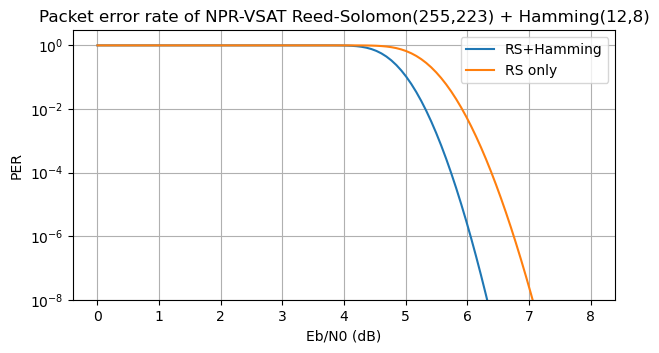

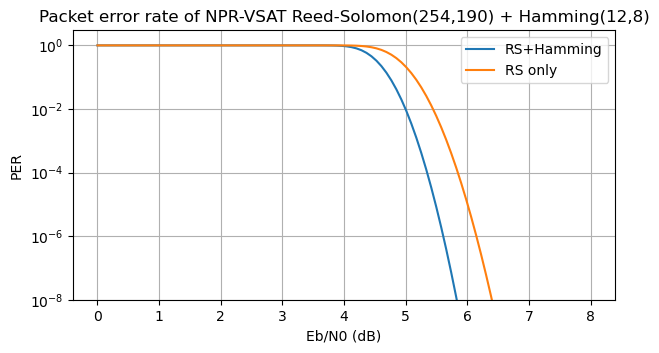

In [3]:
for config in [(255, 223), (190+64, 190)]:
    plt.figure()
    n, k = config
    ebn0 = np.linspace(0, 8, 100)
    pers = per(10**(0.1*ebn0), n, k)
    pers_rs = per(10**(0.1*ebn0), n, k, only_rs=True)
    plt.semilogy(ebn0, pers, label='RS+Hamming')
    plt.semilogy(ebn0, pers_rs, label='RS only')
    plt.grid()
    plt.xticks(np.arange(0, 9))
    plt.title(f'Packet error rate of NPR-VSAT Reed-Solomon({n},{k}) + Hamming(12,8)')
    plt.ylabel('PER')
    plt.xlabel('Eb/N0 (dB)')
    plt.ylim((1e-8, 3))
    plt.legend();